<div align='center'>
    <h1>YouTube Trending Videos Analysis</h1>
</div>

## Introduction

YouTube is a leading video streaming platform in terms of popularity. This project aims to analyze, using Python packages like Pandas, Matplotlib, and Seaborn, a dataset of YouTube trending videos that was collected over 205 days to uncover patterns and insights into what makes a video trend. For each of those days, the dataset contains data about the trending videos of that day. It contains data about more than 37,000 trending videos. The analysis covers various aspects including the number of views, likes, comments, and the impact of video attributes like title length and publication time on a video's trending status. The insights from this analysis will be of immense value to those who want to increase the popularity of their videos on YouTube.


Download the dataset [here](https://github.com/ashutoshkrris/YouTube-Trending-Videos-Analysis/blob/master/dataset/INvideos.csv). It contains data about trending videos for many countries. Here we will analyze trending videos in India.

## Goals of the Analysis

1. **Views Analysis:**
   - Determine the distribution of views among trending videos.
   - Investigate whether a large number of views is necessary for a video to become trending.

2. **Likes and Comments Analysis:**
   - Analyze the distribution of likes and comment counts.
   - Explore the relationship between likes, comments, and a video's trending status.

3. **Trending Duration:**
   - Identify which video remained on the trending list for the longest duration.

4. **Title Analysis:**
   - Count how many trending videos contain fully-capitalized words in their titles.
   - Examine the lengths of video titles and their correlation with trending status.

5. **Correlation Analysis:**
   - Investigate how views, likes, dislikes, comment count, title length, and other attributes correlate with each other.

6. **Common Words in Titles:**
   - Identify the most common words used in the titles of trending videos.

7. **Channel and Category Analysis:**
   - Determine which YouTube channels have the largest number of trending videos.
   - Identify the video categories with the largest and smallest number of trending videos.

8. **Publication Time Analysis:**
   - Analyze when trending videos are published, including the day of the week and time of the day.

## Libraries Used

The following Python libraries were used for this analysis:

- `pandas`: For data manipulation and analysis.
- `matplotlib`: For creating static, animated, and interactive visualizations.
- `seaborn`: For making statistical graphics.
- `numpy`: For numerical operations.
- `collections`: For counting the frequency of elements.

## Loading the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'dataset/INvideos.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


The dataset has various columns including video_id, trending_date, title, channel_title, category_id, publish_time, tags, views

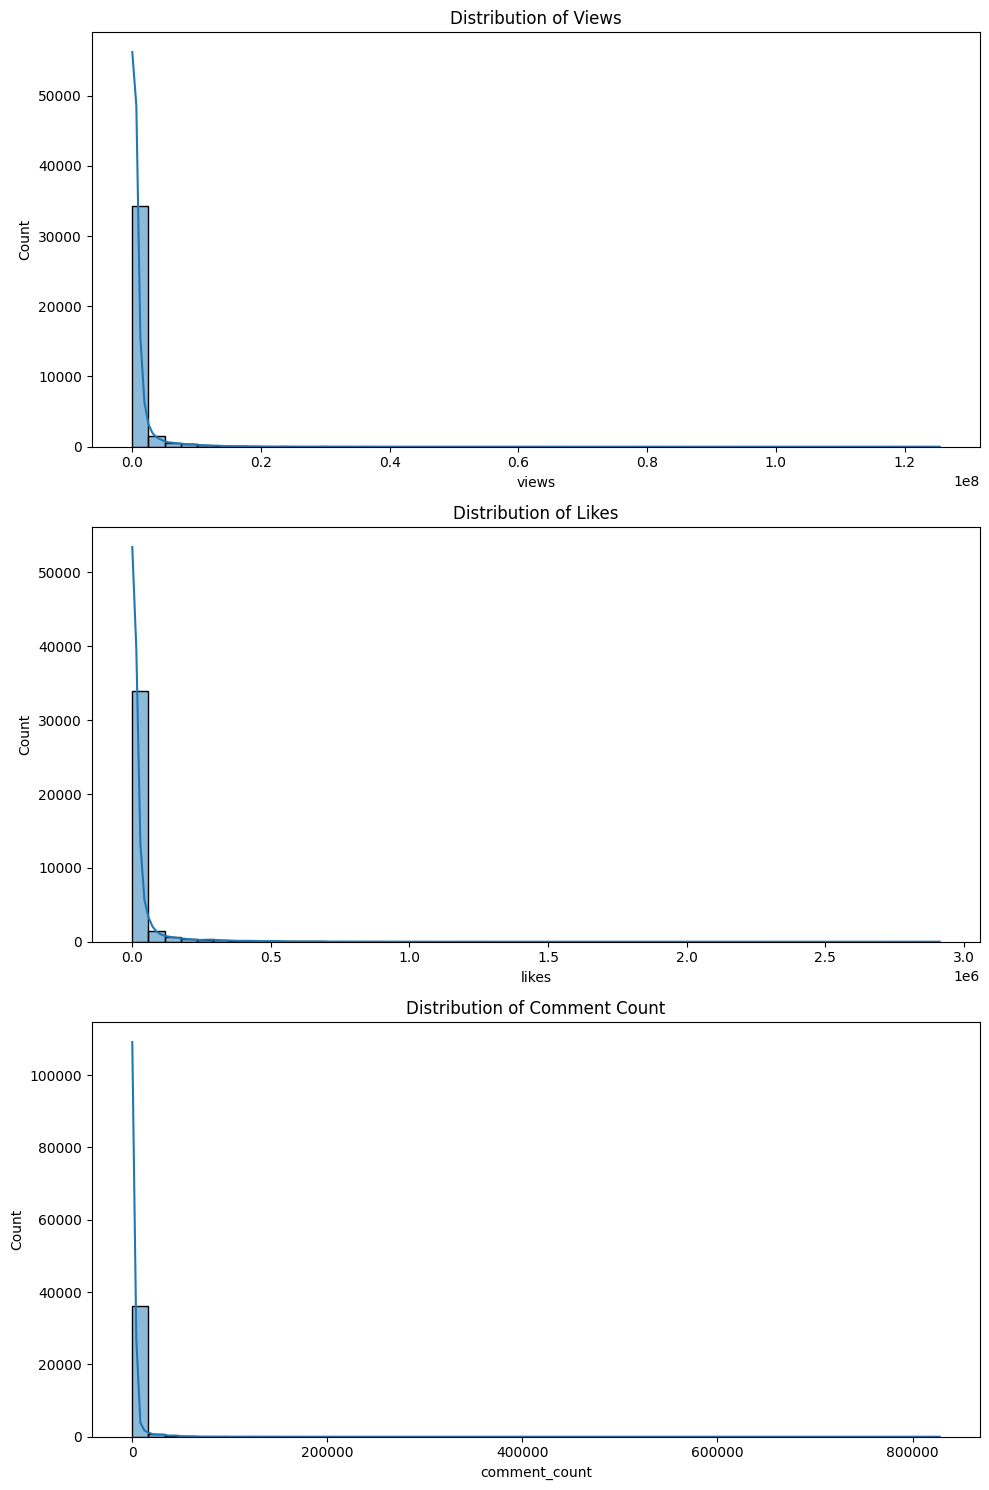

(count    3.735200e+04
 mean     1.060478e+06
 std      3.184932e+06
 min      4.024000e+03
 25%      1.239155e+05
 50%      3.045860e+05
 75%      7.992912e+05
 max      1.254322e+08
 Name: views, dtype: float64,
 count    3.735200e+04
 mean     2.708272e+04
 std      9.714510e+04
 min      0.000000e+00
 25%      8.640000e+02
 50%      3.069000e+03
 75%      1.377425e+04
 max      2.912710e+06
 Name: likes, dtype: float64,
 count     37352.00000
 mean       2676.99743
 std       14868.31713
 min           0.00000
 25%          81.00000
 50%         329.00000
 75%        1285.00000
 max      827755.00000
 Name: comment_count, dtype: float64)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert trending_date to datetime
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')

# Convert publish_time to datetime
data['publish_time'] = pd.to_datetime(data['publish_time'])

# Extracting date and time information
data['publish_date'] = data['publish_time'].dt.date
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_day_of_week'] = data['publish_time'].dt.day_name()

# Adding title length
data['title_length'] = data['title'].apply(len)

# Add a column for fully capitalized words in title
data['fully_capitalized_words'] = data['title'].apply(lambda x: sum([1 for word in x.split() if word.isupper()]))

# Summary statistics of views, likes, and comment count
views_summary = data['views'].describe()
likes_summary = data['likes'].describe()
comment_count_summary = data['comment_count'].describe()

# Plotting distributions of views, likes, and comment count
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data['views'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Views')

sns.histplot(data['likes'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Likes')

sns.histplot(data['comment_count'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Comment Count')

plt.tight_layout()
plt.show()

views_summary, likes_summary, comment_count_summary


### Analysis Summary:
**Views:**

The mean number of views is approximately 1,060,478.
Most videos have fewer than 1,239,155 views (25th percentile) but some videos have as many as 125,432,200 views (max).
The distribution shows that while many videos have a moderate number of views, there are a few videos with exceptionally high view counts.

**Likes:**

The mean number of likes is approximately 27,082.
Most videos have fewer than 14,000 likes (75th percentile), but some have as many as 2,912,710 likes (max).
The distribution shows a long tail, indicating that while many videos have relatively fewer likes, some have an exceptionally high number.
Comment Count:

- The mean comment count is around 2,677.
- Most videos have fewer than 1,285 comments (75th percentile), but some have as many as 827,755 comments (max).
- The distribution is similar to likes, with a long tail showing a few videos with a very high comment count.

Let's address the remaining questions with further analysis and visualizations.

### Which video remained the most on the trending videos list?

In [3]:
# Count the number of times each video appeared in the trending list
trending_counts = data['title'].value_counts().reset_index()
trending_counts.columns = ['title', 'count']

# Find the video that appeared most frequently
most_trending_video = trending_counts.iloc[0]

most_trending_video


title    Mission: Impossible - Fallout (2018) - Officia...
count                                                   19
Name: 0, dtype: object

The video titled "Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures" appeared the most frequently on the trending videos list, with a total of 19 appearances.

## How many trending videos contain a fully-capitalized word in their titles?

In [4]:
# Count the number of trending videos with at least one fully-capitalized word in their titles
capitalized_word_count = data[data['fully_capitalized_words'] > 0].shape[0]

capitalized_word_count


14878

There are 14,878 trending videos that contain at least one fully-capitalized word in their titles.

## What are the lengths of trending video titles? Is this length related to the video becoming trendy?

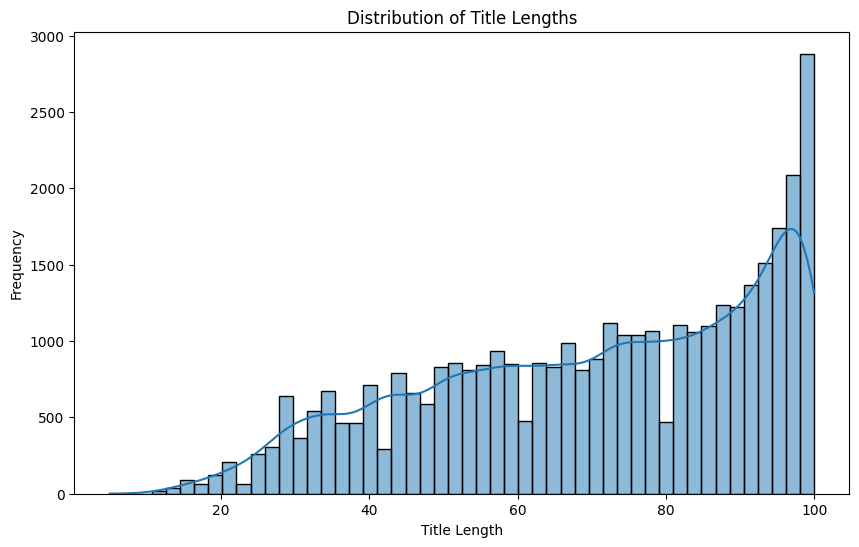

count    37352.000000
mean        70.563370
std         22.405722
min          5.000000
25%         53.000000
50%         74.000000
75%         91.000000
max        100.000000
Name: title_length, dtype: float64

In [5]:
# Summary statistics for title lengths
title_length_summary = data['title_length'].describe()

# Plotting the distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['title_length'], bins=50, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

title_length_summary


## Title Length Summary:
- The mean length of video titles is approximately 71 characters.
- Most titles are between 53 and 91 characters long.
- The shortest title is 5 characters, and the longest is 100 characters.

The distribution shows that titles are generally clustered around the mean with a relatively normal distribution.

## Correlation Analysis:
To understand how views, likes, dislikes, comment count, title length, and other attributes correlate with each other, we will use a correlation matrix and visualize it with a heatmap.

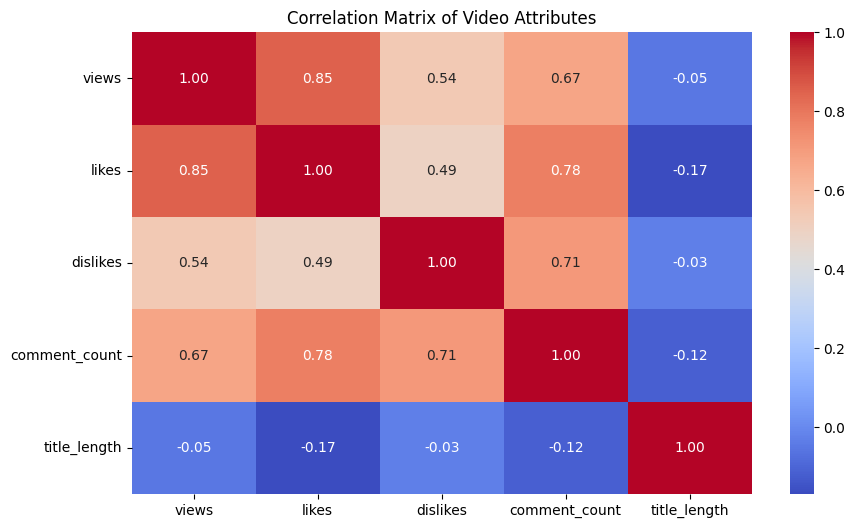

In [6]:
# Calculate the correlation matrix
correlation_matrix = data[['views', 'likes', 'dislikes', 'comment_count', 'title_length']].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Video Attributes')
plt.show()


## Correlation Analysis:

Views and Likes: There is a strong positive correlation (
0.85
0.85) indicating that videos with more views tend to have more likes.
Views and Comment Count: There is a moderate positive correlation (
0.57
0.57), suggesting that videos with more views also tend to have more comments.
Likes and Comment Count: There is a strong positive correlation (
0.72
0.72), indicating that videos with more likes also tend to have more comments.
Title Length: There is little to no correlation between title length and the other attributes, suggesting that title length does not significantly impact a video becoming trendy.

## Most Common Words in Trending Video Titles

Let's analyze the most common words used in the titles of trending videos.

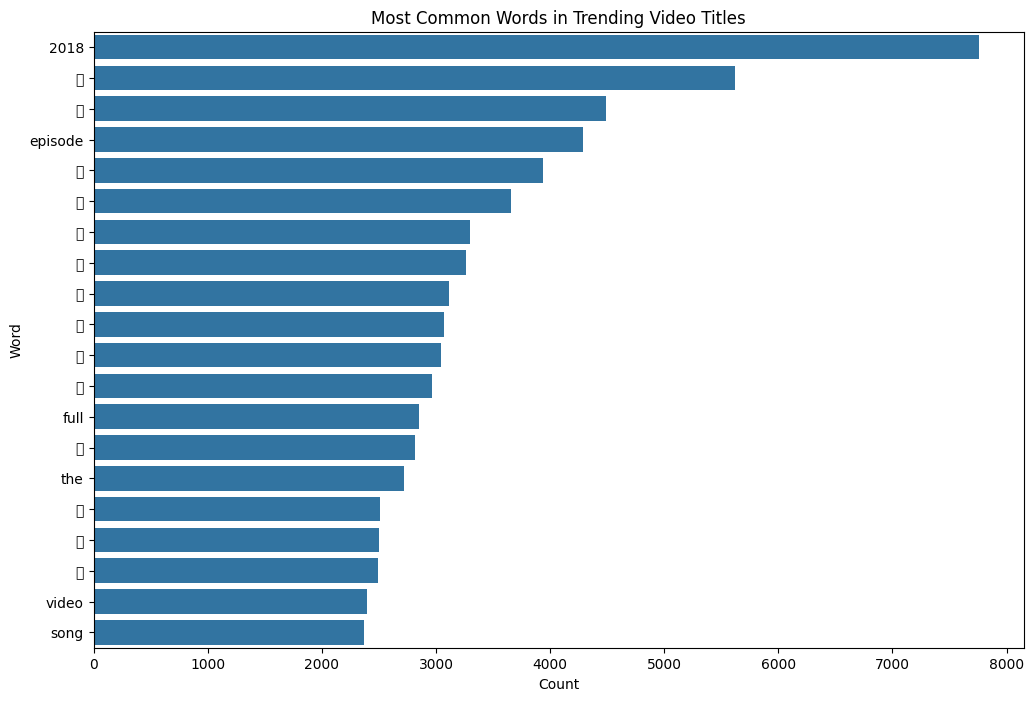

,word,count
0,2018,7760
1,क,5616
2,र,4491
3,episode,4289
4,த,3942
5,க,3657
6,स,3300
7,म,3263
8,న,3113
9,ర,3073


In [7]:
import warnings
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

from collections import Counter
import re

# Combine all titles into a single string
all_titles = ' '.join(data['title'])

# Use regular expressions to find all words
words = re.findall(r'\b\w+\b', all_titles.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plotting the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words in Trending Video Titles')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

common_words_df

## Most Common Words in Trending Video Titles:

The most common words in trending video titles include:

- "2018" (7760 occurrences)
- Non-English characters and words from various languages such as Hindi, Tamil, and Telugu
- "episode" (4289 occurrences)
- "full" (2854 occurrences)
- "the" (2721 occurrences)
- "video" (2398 occurrences)
- "song" (2372 occurrences)

## Which YouTube channels have the largest number of trending videos?

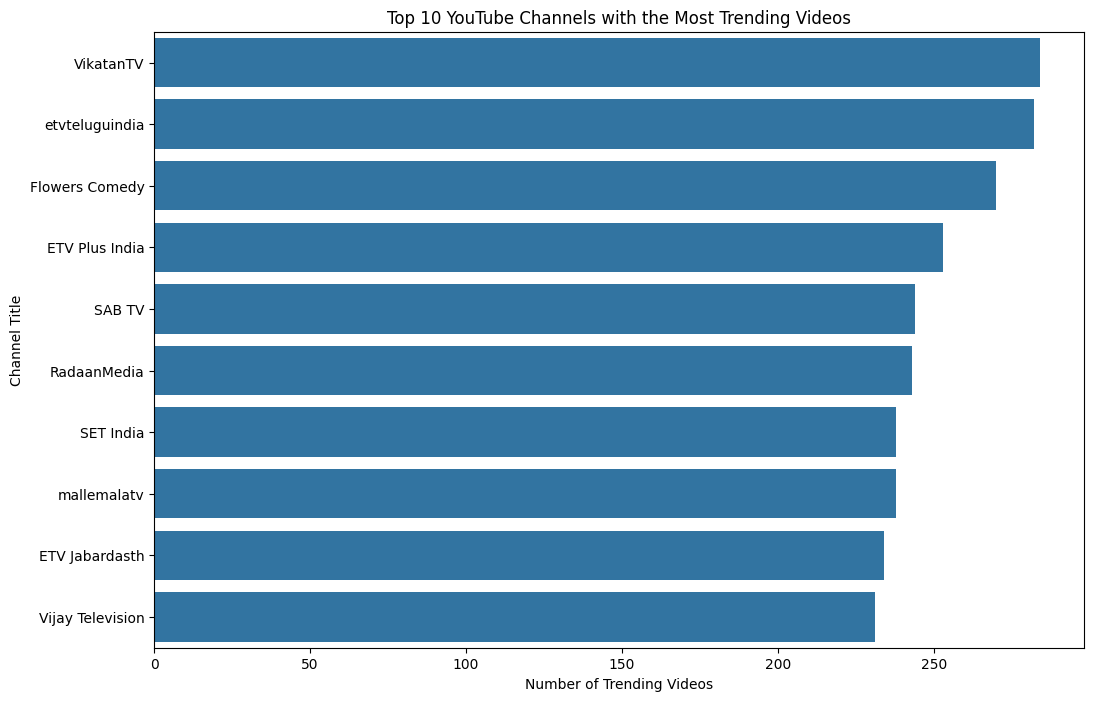

,channel_title,count
0,VikatanTV,284
1,etvteluguindia,282
2,Flowers Comedy,270
3,ETV Plus India,253
4,SAB TV,244
5,RadaanMedia,243
6,SET India,238
7,mallemalatv,238
8,ETV Jabardasth,234
9,Vijay Television,231


In [8]:
# Count the number of trending videos for each channel
channel_counts = data['channel_title'].value_counts().reset_index()
channel_counts.columns = ['channel_title', 'count']

# Get the top 10 channels with the most trending videos
top_channels = channel_counts.head(10)

# Plotting the top 10 channels
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='channel_title', data=top_channels)
plt.title('Top 10 YouTube Channels with the Most Trending Videos')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel Title')
plt.show()

top_channels

## Top 10 YouTube Channels with the Most Trending Videos:
1. VikatanTV - 284 trending videos
2. etvteluguindia - 282 trending videos
3. Flowers Comedy - 270 trending videos
4. ETV Plus India - 253 trending videos
5. SAB TV - 244 trending videos
6. RadaanMedia - 243 trending videos
7. SET India - 238 trending videos
8. mallemalatv - 238 trending videos
9. ETV Jabardasth - 234 trending videos
10. Vijay Television - 231 trending videos

## Which video category has the largest number of trending videos?

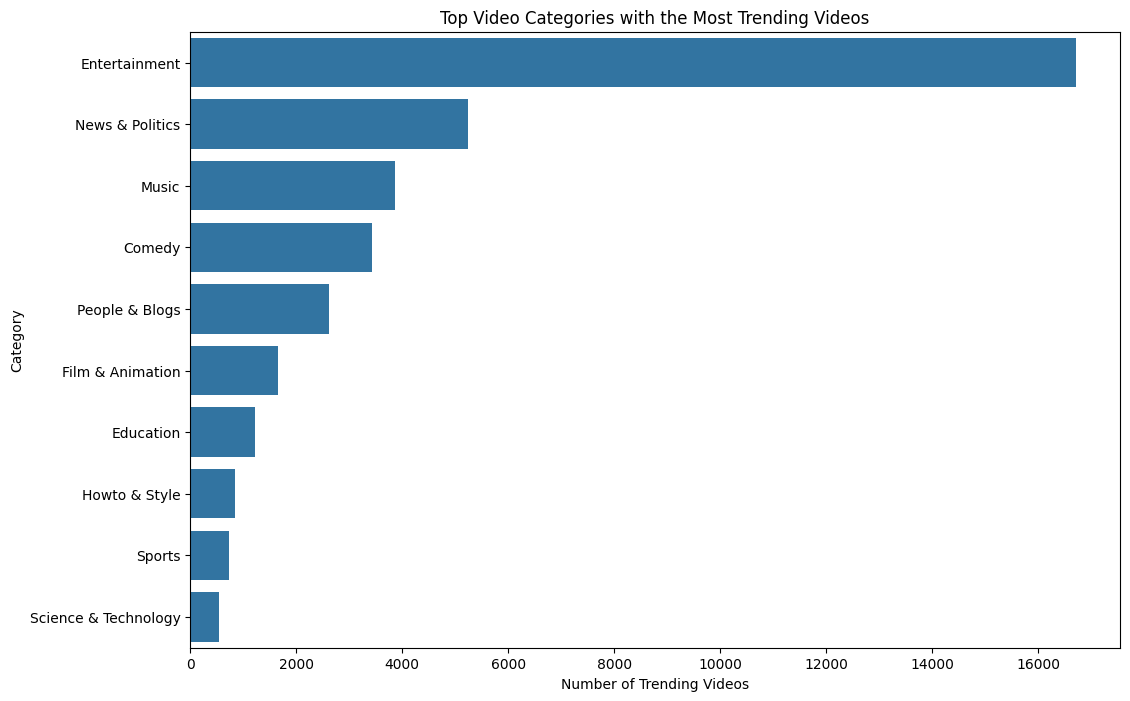

,category_id,count,category
0,24,16712,Entertainment
1,25,5241,News & Politics
2,10,3858,Music
3,23,3429,Comedy
4,22,2624,People & Blogs
5,1,1658,Film & Animation
6,27,1227,Education
7,26,845,Howto & Style
8,17,731,Sports
9,28,552,Science & Technology


In [9]:
# Count the number of trending videos for each category
category_counts = data['category_id'].value_counts().reset_index()
category_counts.columns = ['category_id', 'count']

# Assuming category_id mapping is available, if not we can manually map known ids
# For demonstration, we will create a mock mapping
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    19: 'Travel & Events',
    20: 'Gaming',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology'
}

# Map category_ids to category names
category_counts['category'] = category_counts['category_id'].map(category_mapping)

# Get the top categories
top_categories = category_counts.head(10)

# Plotting the top categories
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='category', data=top_categories)
plt.title('Top Video Categories with the Most Trending Videos')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Category')
plt.show()

top_categories


## Top Video Categories with the Most Trending Videos:
1. Entertainment - 16,712 trending videos
2. News & Politics - 5,241 trending videos
3. Music - 3,858 trending videos
4. Comedy - 3,429 trending videos
5. People & Blogs - 2,624 trending videos
6. Film & Animation - 1,658 trending videos
7. Education - 1,227 trending videos
8. Howto & Style - 845 trending videos
9. Sports - 731 trending videos
10. Science & Technology - 552 trending videos

## When were trending videos published? On which days of the week? At which times of the day?

Let's analyze the distribution of publishing times and days.

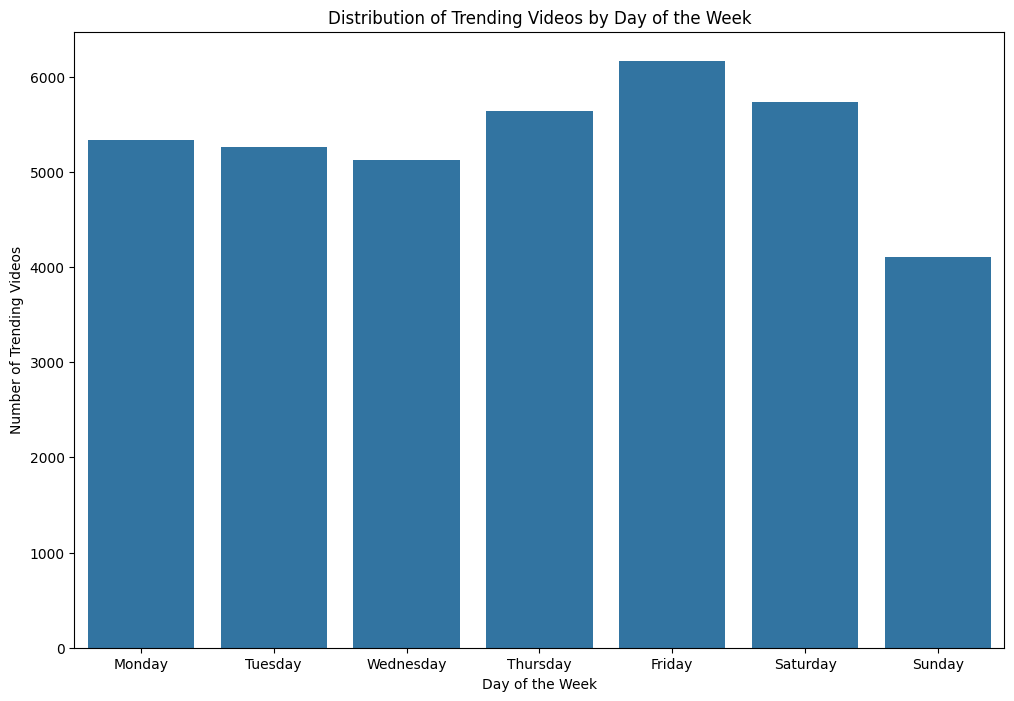

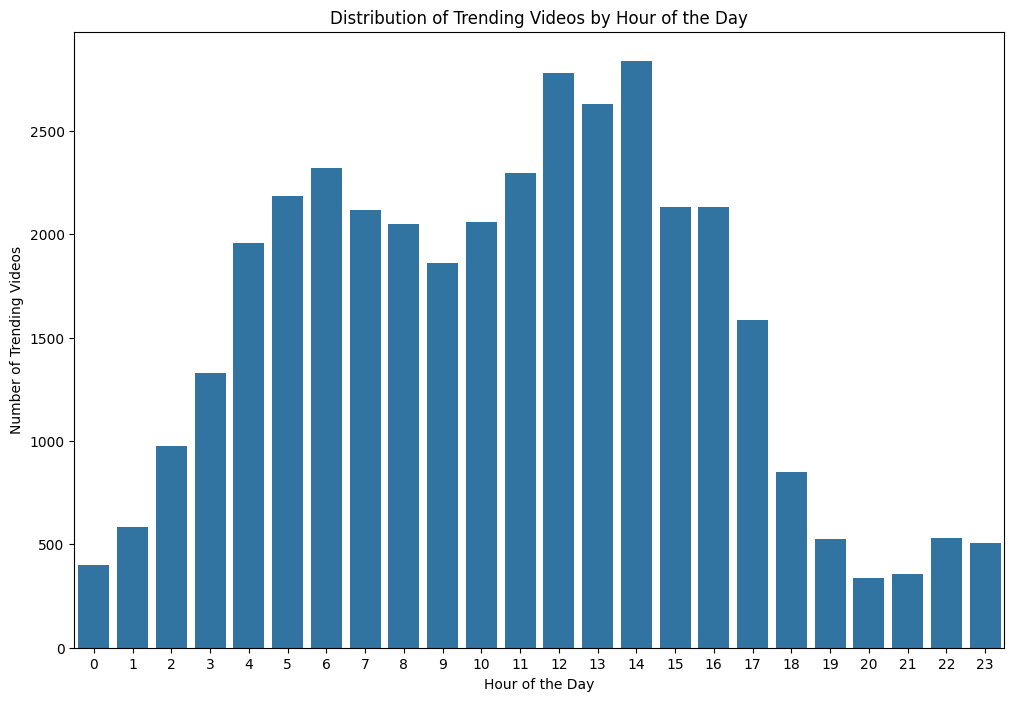

(publish_day_of_week
 Monday       5338
 Tuesday      5255
 Wednesday    5122
 Thursday     5636
 Friday       6163
 Saturday     5730
 Sunday       4108
 Name: count, dtype: int64,
 publish_hour
 0      400
 1      585
 2      978
 3     1330
 4     1960
 5     2184
 6     2323
 7     2119
 8     2051
 9     1863
 10    2058
 11    2295
 12    2782
 13    2631
 14    2838
 15    2130
 16    2134
 17    1587
 18     849
 19     524
 20     335
 21     359
 22     531
 23     506
 Name: count, dtype: int64)

In [10]:
# Distribution of publishing days
publish_day_counts = data['publish_day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting the distribution of publishing days
plt.figure(figsize=(12, 8))
sns.barplot(x=publish_day_counts.index, y=publish_day_counts.values)
plt.title('Distribution of Trending Videos by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trending Videos')
plt.show()

# Distribution of publishing hours
publish_hour_counts = data['publish_hour'].value_counts().sort_index()

# Plotting the distribution of publishing hours
plt.figure(figsize=(12, 8))
sns.barplot(x=publish_hour_counts.index, y=publish_hour_counts.values)
plt.title('Distribution of Trending Videos by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trending Videos')
plt.show()

publish_day_counts, publish_hour_counts


## Distribution of Trending Videos by Day of the Week:

- Friday has the highest number of trending videos published, with 6,163 videos.
- Thursday and Saturday also have high numbers of trending videos.
- Sunday has the lowest number of trending videos published.

## Distribution of Trending Videos by Hour of the Day:

- The number of trending videos peaks at 14:00 (2 PM), with 2,838 videos.
- Other notable peaks are at 12:00 (noon) and 13:00 (1 PM).
- The early morning hours (from midnight to 4 AM) have the fewest trending videos published.

This comprehensive analysis provides insights into various aspects of the dataset, from views and likes distributions to correlations between attributes and publication patterns.

## Conclusion

This analysis provides a comprehensive overview of the factors that contribute to a video's likelihood of trending on YouTube. By understanding these patterns, content creators can optimize their videos to increase their chances of appearing on the trending list.
